In [7]:
import pandas as pd
from utils import create_sample

# Create sample if not created yet

In [10]:

# create_sample(filename='../datasets/data/test.csv', sample_filename='../datasets/data/test_sample.csv')

In [17]:
df = pd.read_csv('../datasets/data/test_sample.csv')
df.head()

,Unnamed: 0,srch_id,date_time,site_id,visitor_location_country_id,visitor_hist_starrating,visitor_hist_adr_usd,prop_country_id,prop_id,prop_starrating,prop_review_score,prop_brand_bool,prop_location_score1,prop_location_score2,prop_log_historical_price,price_usd,promotion_flag,srch_destination_id,srch_length_of_stay,srch_booking_window,srch_adults_count,srch_children_count,srch_room_count,srch_saturday_night_bool,srch_query_affinity_score,orig_destination_distance,random_bool,comp1_rate,comp1_inv,comp1_rate_percent_diff,comp2_rate,comp2_inv,comp2_rate_percent_diff,comp3_rate,comp3_inv,comp3_rate_percent_diff,comp4_rate,comp4_inv,comp4_rate_percent_diff,comp5_rate,comp5_inv,comp5_rate_percent_diff,comp6_rate,comp6_inv,comp6_rate_percent_diff,comp7_rate,comp7_inv,comp7_rate_percent_diff,comp8_rate,comp8_inv,comp8_rate_percent_diff
0,0,2,2012-11-05 21:28:38,15,55,NaN,NaN,98,3105,3,2.0,0,3.09,0.0931,4.28,164.59,0,13085,2,57,2,0,1,0,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,2,2012-11-05 21:28:38,15,55,NaN,NaN,98,78858,4,4.5,1,1.79,0.0360,4.97,174.18,1,13085,2,57,2,0,1,0,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,3,2013-06-05 17:56:22,5,219,NaN,NaN,219,55688,5,4.5,0,2.94,0.0191,0.00,343.00,1,10797,1,21,4,0,2,0,NaN,22.92,1,NaN,NaN,NaN,0.0,0.0,NaN,1.0,0.0,12.0,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN
3,3,5,2013-03-21 21:59:35,9,59,NaN,NaN,219,13603,4,4.5,1,5.61,0.0706,6.04,364.70,0,4562,7,2,3,0,1,0,NaN,NaN,0,NaN,NaN,NaN,0.0,0.0,NaN,0.0,0.0,NaN,1.0,0.0,19.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN
4,4,5,2013-03-21 21:59:35,9,59,NaN,NaN,219,41347,4,4.0,0,4.11,0.0036,6.04,504.28,0,4562,7,2,3,0,1,0,NaN,NaN,0,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,11.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,-1.0,42.0


In [18]:
null_counts = df.isnull().sum()
refined_cols = null_counts[null_counts <145483]
refined_cols

Unnamed: 0                       0
srch_id                          0
date_time                        0
site_id                          0
visitor_location_country_id      0
prop_country_id                  0
prop_id                          0
prop_starrating                  0
prop_review_score              968
prop_brand_bool                  0
prop_location_score1             0
prop_log_historical_price        0
price_usd                        0
promotion_flag                   0
srch_destination_id              0
srch_length_of_stay              0
srch_booking_window              0
srch_adults_count                0
srch_children_count              0
srch_room_count                  0
srch_saturday_night_bool         0
random_bool                      0
dtype: int64

In [19]:
cols = []
for items in refined_cols.iteritems():
    cols.append(items[0])

In [20]:
cols

['Unnamed: 0',
 'srch_id',
 'date_time',
 'site_id',
 'visitor_location_country_id',
 'prop_country_id',
 'prop_id',
 'prop_starrating',
 'prop_review_score',
 'prop_brand_bool',
 'prop_location_score1',
 'prop_log_historical_price',
 'price_usd',
 'promotion_flag',
 'srch_destination_id',
 'srch_length_of_stay',
 'srch_booking_window',
 'srch_adults_count',
 'srch_children_count',
 'srch_room_count',
 'srch_saturday_night_bool',
 'random_bool']

In [21]:
df = df.filter(cols, axis=1)
df = df.drop('Unnamed: 0', axis=1)

In [22]:
df.head()

,srch_id,date_time,site_id,visitor_location_country_id,prop_country_id,prop_id,prop_starrating,prop_review_score,prop_brand_bool,prop_location_score1,prop_log_historical_price,price_usd,promotion_flag,srch_destination_id,srch_length_of_stay,srch_booking_window,srch_adults_count,srch_children_count,srch_room_count,srch_saturday_night_bool,random_bool
0,2,2012-11-05 21:28:38,15,55,98,3105,3,2.0,0,3.09,4.28,164.59,0,13085,2,57,2,0,1,0,0
1,2,2012-11-05 21:28:38,15,55,98,78858,4,4.5,1,1.79,4.97,174.18,1,13085,2,57,2,0,1,0,0
2,3,2013-06-05 17:56:22,5,219,219,55688,5,4.5,0,2.94,0.00,343.00,1,10797,1,21,4,0,2,0,1
3,5,2013-03-21 21:59:35,9,59,219,13603,4,4.5,1,5.61,6.04,364.70,0,4562,7,2,3,0,1,0,0
4,5,2013-03-21 21:59:35,9,59,219,41347,4,4.0,0,4.11,6.04,504.28,0,4562,7,2,3,0,1,0,0


In [23]:
df['prop_review_score'].dtype

dtype('float64')

In [24]:
pd.to_numeric(df['prop_review_score'], errors='coerce')

0         2.0
1         4.5
2         4.5
3         4.5
4         4.0
         ... 
662257    4.0
662258    3.0
662259    0.0
662260    4.0
662261    4.0
Name: prop_review_score, Length: 662262, dtype: float64

In [25]:
df['prop_review_score'].fillna((df['prop_review_score'].median()), inplace=True)

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 662262 entries, 0 to 662261
Data columns (total 21 columns):
srch_id                        662262 non-null int64
date_time                      662262 non-null object
site_id                        662262 non-null int64
visitor_location_country_id    662262 non-null int64
prop_country_id                662262 non-null int64
prop_id                        662262 non-null int64
prop_starrating                662262 non-null int64
prop_review_score              662262 non-null float64
prop_brand_bool                662262 non-null int64
prop_location_score1           662262 non-null float64
prop_log_historical_price      662262 non-null float64
price_usd                      662262 non-null float64
promotion_flag                 662262 non-null int64
srch_destination_id            662262 non-null int64
srch_length_of_stay            662262 non-null int64
srch_booking_window            662262 non-null int64
srch_adults_count              6

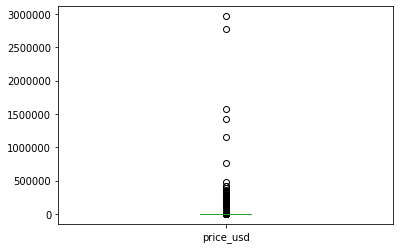

In [28]:
df['price_usd'].plot.box()

In [29]:
df.groupby("srch_length_of_stay")['price_usd'].max()

srch_length_of_stay
1     2778356.41
2     1582078.00
3     2966046.00
4      141036.00
5       73531.00
6      195623.00
7      225010.00
8        3774.96
9        3581.97
10       2663.81
11       2045.00
12     155809.00
13       1396.00
14       2141.64
15       1213.18
16        720.32
17        865.63
18        591.00
19        718.85
20        632.75
21        977.10
22        424.66
23        387.00
24     101609.58
25        332.00
26        794.88
27        629.00
28        750.12
30        403.00
31        180.00
32        149.00
33        346.00
34         93.78
39        120.01
45         99.00
49         53.73
Name: price_usd, dtype: float64

In [30]:
df.groupby("srch_length_of_stay")['price_usd'].min()

srch_length_of_stay
1       0.01
2       0.00
3       0.00
4       0.02
5       0.09
6       0.00
7       1.20
8       4.59
9       8.27
10      6.29
11      0.89
12     12.56
13      8.91
14      2.67
15     17.00
16     21.74
17     31.00
18     17.65
19     13.73
20     25.00
21     14.91
22     13.00
23     46.71
24     65.68
25     27.00
26     42.00
27     23.43
28     23.11
30     53.22
31     36.00
32     72.00
33    127.00
34     45.93
39     33.16
45     93.00
49     53.73
Name: price_usd, dtype: float64

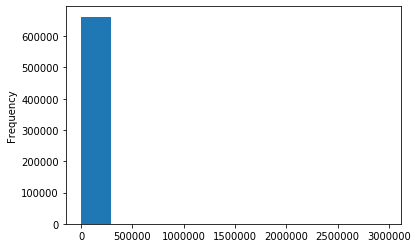

In [31]:
df['price_usd'].plot.hist()

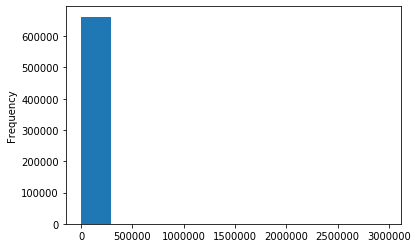

In [32]:
df['price_usd'].plot.hist()

In [33]:
df[df.price_usd > 5000]

,srch_id,date_time,site_id,visitor_location_country_id,prop_country_id,prop_id,prop_starrating,prop_review_score,prop_brand_bool,prop_location_score1,prop_log_historical_price,price_usd,promotion_flag,srch_destination_id,srch_length_of_stay,srch_booking_window,srch_adults_count,srch_children_count,srch_room_count,srch_saturday_night_bool,random_bool
1919,2037,2013-06-27 18:55:02,16,216,213,68186,4,4.5,1,0.69,0.00,13826.60,1,26676,2,57,1,0,1,1,1
1920,2037,2013-06-27 18:55:02,16,216,213,108828,4,4.0,0,0.69,0.00,9260.76,0,26676,2,57,1,0,1,1,1
1921,2037,2013-06-27 18:55:02,16,216,213,124563,5,4.0,1,3.50,0.00,21883.96,0,26676,2,57,1,0,1,1,1
1922,2037,2013-06-27 18:55:02,16,216,213,127003,4,4.5,0,0.69,0.00,9000.00,1,26676,2,57,1,0,1,1,1
1923,2037,2013-06-27 18:55:02,16,216,213,133244,4,4.5,0,3.85,0.00,15521.51,1,26676,2,57,1,0,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
655778,659101,2012-12-19 16:24:59,28,117,117,9595,3,0.0,0,4.13,0.00,10704.23,0,12140,1,1,2,0,1,1,1
655779,659101,2012-12-19 16:24:59,28,117,117,95429,5,4.5,0,4.58,5.21,30000.61,0,12140,1,1,2,0,1,1,1
655780,659101,2012-12-19 16:24:59,28,117,117,120173,3,3.0,0,4.13,4.13,11009.99,1,12140,1,1,2,0,1,1,1
660825,664120,2013-06-22 01:08:47,5,216,219,42875,3,4.0,1,4.60,0.00,32005.00,1,20319,3,50,2,2,1,0,0


In [34]:
df = df[df.price_usd < 5000]

In [35]:
df.groupby("srch_length_of_stay")['price_usd'].max()

srch_length_of_stay
1     4946.66
2     4870.00
3     4766.00
4     4107.00
5     3810.93
6     4565.00
7     3889.45
8     3774.96
9     3581.97
10    2663.81
11    2045.00
12    2650.47
13    1396.00
14    2141.64
15    1213.18
16     720.32
17     865.63
18     591.00
19     718.85
20     632.75
21     977.10
22     424.66
23     387.00
24     297.16
25     332.00
26     794.88
27     629.00
28     750.12
30     403.00
31     180.00
32     149.00
33     346.00
34      93.78
39     120.01
45      99.00
49      53.73
Name: price_usd, dtype: float64

In [36]:
df.dtypes

srch_id                          int64
date_time                       object
site_id                          int64
visitor_location_country_id      int64
prop_country_id                  int64
prop_id                          int64
prop_starrating                  int64
prop_review_score              float64
prop_brand_bool                  int64
prop_location_score1           float64
prop_log_historical_price      float64
price_usd                      float64
promotion_flag                   int64
srch_destination_id              int64
srch_length_of_stay              int64
srch_booking_window              int64
srch_adults_count                int64
srch_children_count              int64
srch_room_count                  int64
srch_saturday_night_bool         int64
random_bool                      int64
dtype: object

# Not sure how to process date-time but its an important feature. I drop for now

In [46]:
df = df.drop('date_time', axis=1)

In [47]:
df.head()

,srch_id,site_id,visitor_location_country_id,prop_country_id,prop_id,prop_starrating,prop_review_score,prop_brand_bool,prop_location_score1,prop_log_historical_price,price_usd,promotion_flag,srch_destination_id,srch_length_of_stay,srch_booking_window,srch_adults_count,srch_children_count,srch_room_count,srch_saturday_night_bool,random_bool,click_bool
0,2,15,55,98,3105,3,2.0,0,3.089844,4.281250,164.625,0,13085,2,57,2,0,1,0,0,0
1,2,15,55,98,78858,4,4.5,1,1.790039,4.968750,174.125,1,13085,2,57,2,0,1,0,0,0
2,3,5,219,219,55688,5,4.5,0,2.939453,0.000000,343.000,1,10797,1,21,4,0,2,0,1,0
3,5,9,59,219,13603,4,4.5,1,5.609375,6.039062,364.750,0,4562,7,2,3,0,1,0,0,0
4,5,9,59,219,41347,4,4.0,0,4.109375,6.039062,504.250,0,4562,7,2,3,0,1,0,0,0


In [48]:
target = 'click_bool'
numerics = ['prop_review_score', 'prop_location_score1', 'prop_log_historical_price', 'price_usd']
categories = []

for cols in df.columns:
    if cols in numerics:
        continue
    categories.append(cols)
# categories.remove('click_bool')
categories

['srch_id',
 'site_id',
 'visitor_location_country_id',
 'prop_country_id',
 'prop_id',
 'prop_starrating',
 'prop_brand_bool',
 'promotion_flag',
 'srch_destination_id',
 'srch_length_of_stay',
 'srch_booking_window',
 'srch_adults_count',
 'srch_children_count',
 'srch_room_count',
 'srch_saturday_night_bool',
 'random_bool',
 'click_bool']

In [49]:
for col in categories:
    df[col] = df[col].astype('category')

In [50]:
for col in numerics:
    df[col] = df[col].astype('float16')

In [51]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 661885 entries, 0 to 662261
Data columns (total 21 columns):
srch_id                        661885 non-null category
site_id                        661885 non-null category
visitor_location_country_id    661885 non-null category
prop_country_id                661885 non-null category
prop_id                        661885 non-null category
prop_starrating                661885 non-null category
prop_review_score              661885 non-null float16
prop_brand_bool                661885 non-null category
prop_location_score1           661885 non-null float16
prop_log_historical_price      661885 non-null float16
price_usd                      661885 non-null float16
promotion_flag                 661885 non-null category
srch_destination_id            661885 non-null category
srch_length_of_stay            661885 non-null category
srch_booking_window            661885 non-null category
srch_adults_count              661885 non-null catego

# There is no click_bool target in test.csv making it explicitly and saying its all zero for now

In [52]:
df['click_bool'] = 0

In [53]:
df.head()

,srch_id,site_id,visitor_location_country_id,prop_country_id,prop_id,prop_starrating,prop_review_score,prop_brand_bool,prop_location_score1,prop_log_historical_price,price_usd,promotion_flag,srch_destination_id,srch_length_of_stay,srch_booking_window,srch_adults_count,srch_children_count,srch_room_count,srch_saturday_night_bool,random_bool,click_bool
0,2,15,55,98,3105,3,2.0,0,3.089844,4.281250,164.625,0,13085,2,57,2,0,1,0,0,0
1,2,15,55,98,78858,4,4.5,1,1.790039,4.968750,174.125,1,13085,2,57,2,0,1,0,0,0
2,3,5,219,219,55688,5,4.5,0,2.939453,0.000000,343.000,1,10797,1,21,4,0,2,0,1,0
3,5,9,59,219,13603,4,4.5,1,5.609375,6.039062,364.750,0,4562,7,2,3,0,1,0,0,0
4,5,9,59,219,41347,4,4.0,0,4.109375,6.039062,504.250,0,4562,7,2,3,0,1,0,0,0


In [54]:
df['click_bool'].unique()

array([0])

In [55]:
data.to_csv('../datasets/data/processed_test.csv')